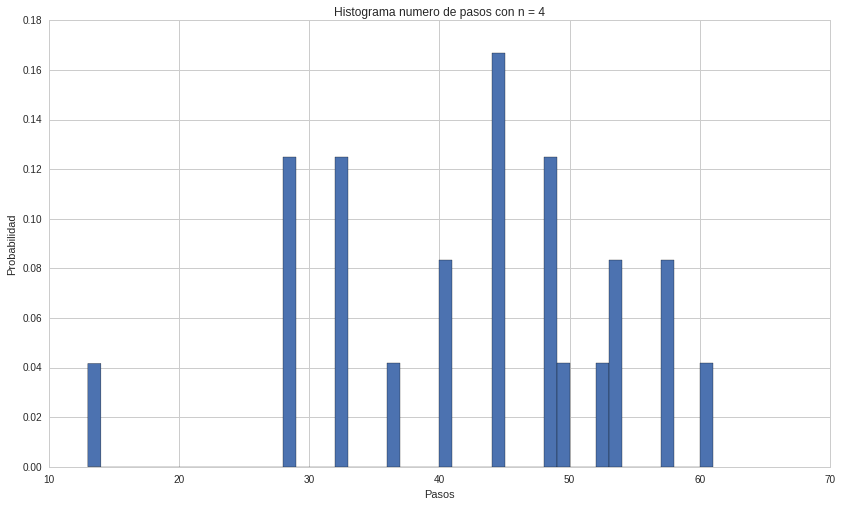


Numero promedio de pasos: 42.125

Minimo numero de pasos: 13.0

Maximo numero de pasos: 61.0


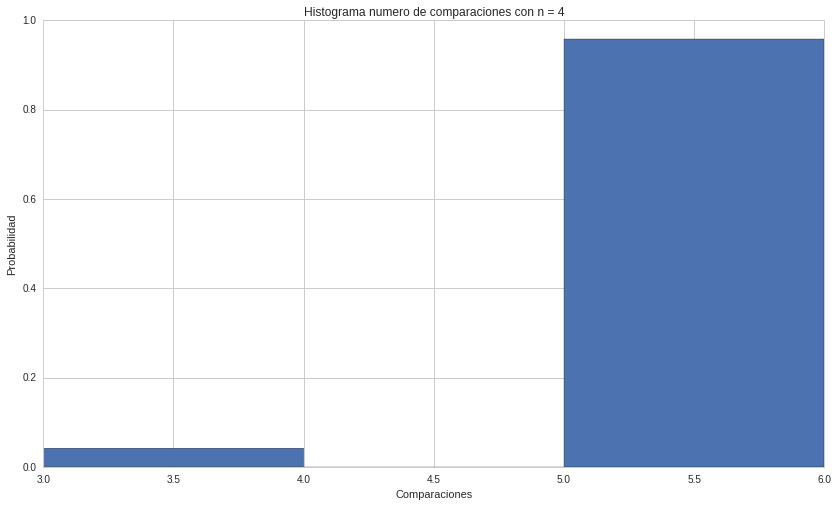


Numero promedio de comparaciones: 5.58333333333

Minimo numero de comparaciones: 3.0

Maximo numero de comparaciones: 6.0


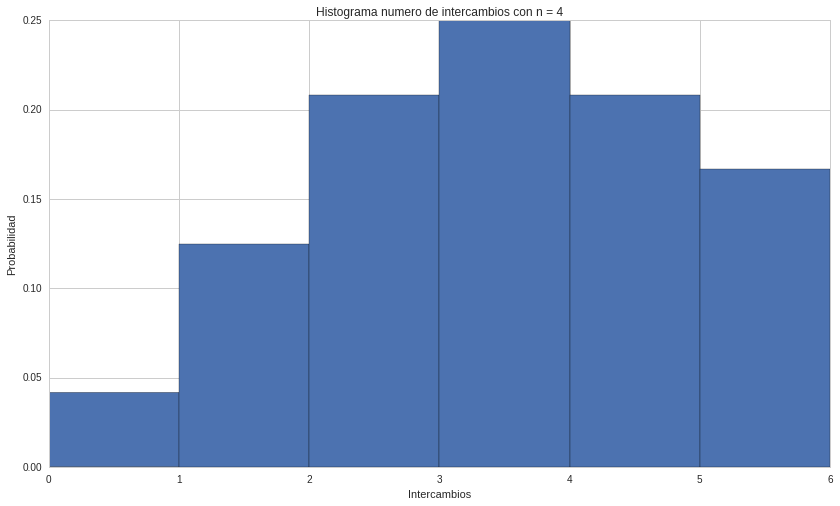


Numero promedio de intercambios: 3.0

Minimo numero de comparaciones: 0.0

Maximo numero de comparaciones: 6.0


In [3]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

def bubbleSortCounter(arreglo,largoArreglo):
	#Inicializar contadores
	numeroPasos = 0
	numeroComparaciones = 0
	numeroIntercambios = 0
	arrayDelete=np.zeros(largoArreglo,dtype=int)
	i = 0;numeroPasos+=1
	while(i<largoArreglo):
		j=1
		intercambiado = False
		while(j<largoArreglo-i):
			numeroComparaciones+=1									#Comparacion en el while anterior
			if(arreglo[j-1]>arreglo[j]):
				arreglo[j-1],arreglo[j] = arreglo[j],arreglo[j-1] 	#Hacer intercambio
				arrayDelete[j]+=1
				intercambiado = True
				numeroIntercambios+=1								#Sumar intercambio
				numeroPasos+=4 										#Hacer un intercambio requiere estos pasos
			j+=1
			numeroPasos+=3
		numeroPasos+=3
		if(not intercambiado):
			break
		i+=1
		numeroPasos+=2
        
	return arreglo,numeroPasos,numeroComparaciones,numeroIntercambios,arrayDelete
	
class MyPerm:
    def __init__(self):
        self.arreglo = [] 	#Define arreglo para hacer las permutaciones
        self.used = [0]*100 #Máximo 100 permutaciones
        self.posicionActual=0
        self.permutacion=[]
    def permutacionesTemp(self,n):
        if(self.posicionActual==n):
            self.arreglo.append(list(self.permutacion))
            return
        self.posicionActual+=1        
        for i in range(n):
            if(self.used[i]==1): continue
            self.used[i]=1;self.permutacion.append(i);
            self.permutacionesTemp(n)
            self.used[i]=0;self.permutacion.pop()
        self.posicionActual-=1
    
    def permutations (self,n):	#inicializar clase
        self.__init__()
        self.permutacionesTemp(n)
        return self.arreglo
		
def calcular(metodo,**kwargs):
    n = kwargs.get('n',None)
    permutacion = []
    numeroPermutacion = 0
    if(metodo==0):  # método de itertools
        permutacion = np.array(list(itertools.permutations(range(n))))
        numeroPermutacion = len(permutacion)
    elif(metodo==1): #método recursivo
        e = MyPerm()
        permutacion = e.permutations(n)
        numeroPermutacion = len(permutacion)
		
    pasos = np.empty(numeroPermutacion)
    comparaciones = np.empty(numeroPermutacion)
    intercambios = np.empty(numeroPermutacion)
    for i in range (numeroPermutacion):
        permutacionAux = np.copy(permutacion[i])
        arreglo,numeroPasos,numeroComparaciones,numeroIntercambios,arrayDelete = bubbleSortCounter(permutacionAux,n)
        pasos[i]=numeroPasos
        comparaciones[i]=numeroComparaciones
        intercambios[i]=numeroIntercambios
    return pasos,comparaciones,intercambios,permutacion,numeroPermutacion
	
def histogramaPasos(pasos,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(pasos), max(pasos)								#Obtener los extremos del histograma
    plt.hist(pasos, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de pasos con n = "+str(n))									#Añadir titulo al histograma
    plt.xlabel('Pasos')														#Añadir label a eje x
    plt.ylabel('Probabilidad')															#Añadir label a eje y
    plt.show()																			
    
    #Imprimir datos
    vals,counts = np.unique(pasos,return_counts=True)
    print("\nNumero promedio de pasos: "+str(np.average(pasos)))
    print("\nMinimo numero de pasos: "+str(min_numeroPasos))
    print("\nMaximo numero de pasos: "+str(max_numeroPasos))
    
def histogramaComparaciones(comparaciones,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(comparaciones), max(comparaciones)						#Obtener los extremos del histograma
    plt.hist(comparaciones, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de comparaciones con n = "+str(n))									#Añadir titulo al histograma
    plt.xlabel('Comparaciones')																	#Añadir label a eje x
    plt.ylabel('Probabilidad')																	#Añadir label a eje y
    plt.show()

    #Imprimir datos
    vals,counts = np.unique(comparaciones,return_counts=True)
    print("\nNumero promedio de comparaciones: "+str(np.average(comparaciones)))
    print("\nMinimo numero de comparaciones: "+str(min_numeroPasos))
    print("\nMaximo numero de comparaciones: "+str(max_numeroPasos))
        
def histogramaIntercambios(intercambios,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(intercambios), max(intercambios)						#Obtener los extremos del histograma
    plt.hist(intercambios, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de intercambios con n = "+str(n))								#Añadir titulo al histograma
    plt.xlabel('Intercambios')																	#Añadir label a eje x
    plt.ylabel('Probabilidad')																	#Añadir label a eje y
    plt.show()
    
	#Imprimir datos
    vals,counts = np.unique(intercambios,return_counts=True)
    print("\nNumero promedio de intercambios: "+str(np.average(intercambios)))
    print("\nMinimo numero de comparaciones: "+str(min_numeroPasos))
    print("\nMaximo numero de comparaciones: "+str(max_numeroPasos))
        
#Programa principal: para usar itertools poner 0 en counter, para usar recursion poner 1 en counter
nPermRequired = 4
pasos,comparaciones,intercambios,permutacion,numeroPermutaciones = calcular(0,n=nPermRequired)
histogramaPasos(pasos,numeroPermutaciones,nPermRequired)
histogramaComparaciones(comparaciones,numeroPermutaciones,nPermRequired)
histogramaIntercambios(intercambios,numeroPermutaciones,nPermRequired)